# Exploratory Analysis of Bank Transactions and Anomaly Detection

---

## Introduction & Objective

This project explores a bank transaction dataset to uncover insights into user financial behaviour and identify potential anomalies or suspicious activity. Using Python and common data analysis tools, we will clean, explore, and visualise the data to simulate real-world financial analytics processes. This work serves as a practical portfolio project to demonstrate key data analysis skills.

### <u>Objective</u>
The goal of this project is to analyse a sample of bank transaction data to:

- Understand customer transaction behaviour across different channels, times, and locations.
- Identify unusual or potentially fraudulent transactions using simple rule-based anomaly detection techniques.
- Practice essential data analysis tasks including data cleaning, feature engineering, visualisation, and insight generation using Python.

This project is designed as a portfolio piece for data analyst roles and focuses on real-world analytical thinking, not just code.

### <u>Why This Matters</u>
In the modern digital economy, banking systems process millions of transactions daily. Financial institutions must continuously monitor these transactions to:

- Detect fraudulent activity.
- Understand customer behaviour to improve services.
- Maintain account security and financial integrity.

By analysing patterns in transactional data, we can uncover insights that are useful for fraud detection, risk management, and product personalisation. Even with a small dataset, the techniques applied here reflect processes used in real-world analytics teams in the financial sector.

### <u>About the Dataset</u>
The dataset used in this project is titled “**Bank Transaction Dataset for Fraud Detection**” and is publicly available on Kaggle:
[Bank Transaction Dataset for Fraud Detection - Kaggle](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection)

It contains 2,512 individual bank transactions with the following features:

- Transaction metadata: transaction ID, amount, date, type (credit/debit), merchant, location, device, IP.
- Account holder data: customer age, occupation, account balance, previous transaction time.
- Interaction data: login attempts, transaction duration, channel used.

These features allow us to explore both financial patterns and user behaviour across time, geography, and transaction types.

### <u>Key Questions to Explore</u>
This project aims to explore the following:

1. What are the typical transaction patterns across users? (time, channel, type)
2. Are there differences in behaviour based on customer age or occupation?
3. How do users interact with different devices, channels, and locations?
4. Are there transactions that appear suspicious based on volume, time, or user behaviour?
5. Can we derive any simple rule-based indicators that may help detect anomalies?

### <u>Tools & Technologies</u>
- Python (Jupyter Notebook)
- Pandas, NumPy for data handling and cleaning
- Matplotlib, Seaborn, Plotly for visualisation
- Datetime for time-based features and analysis

---

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

---

## Data Loading & Initial Inspection

In this section, we load the dataset and conduct an initial inspection to understand its structure, data types, and completeness. This forms the foundation for all further analysis by helping us identify potential issues such as missing values, incorrect data types, and duplicate records.

We begin by reading the CSV file into a Pandas DataFrame and displaying the first few rows to get an initial sense of the data.

In [2]:
# read the CSV file
df = pd.read_csv('bank_transactions_data.csv')
# display the first few rows of the dataframe
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


The `.info()` method helps us quickly examine column names, data types, and any null values. This is useful for spotting columns that may need cleaning or conversion.

In [3]:
# inspect the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

It is immediately apparent that the `TransactionDate` and `PreviousTransactionDate` columns are currently of `object` data type; consequently, they should be converted to `datetime` format to facilitate time-based analysis later in the project.

In [4]:
# change the data type of the 'TransactionDate' column to datetime with format year-month-day hour-minute-second
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%Y-%m-%d %H:%M:%S')
print('Data type of TransactionDate is now:', df['TransactionDate'].dtype)
# change the data type of the 'PreviousTransactionDate' column to datetime with format year-month-day hour-minute-second
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], format='%Y-%m-%d %H:%M:%S')
print('Data type of PreviousTransactionDate is now:',df['PreviousTransactionDate'].dtype)

Data type of TransactionDate is now: datetime64[ns]
Data type of PreviousTransactionDate is now: datetime64[ns]



It is also worth noting that each column contains 2512 non-null values, which is the exact number of bank transactions in the dataset. However, let us confirm the absence of any null values across all columns.

In [5]:
# check for missing values
print(df.isnull().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


Let us check for:
- Exact duplicates across all columns
- Duplicate entries based on key transaction features (excluding `TransactionID`)

In [6]:
# check for exact duplicates
print('Number of exact duplicates:',df.duplicated().sum())

Number of exact duplicates: 0


In [7]:
# check for duplicates in key transaction features (excluding TransactionID)
duplicates = df.duplicated(subset=['AccountID', 'TransactionAmount', 'TransactionDate']).sum()
print('Number of duplicates based on key transaction features:', duplicates)

Number of duplicates based on key transaction features: 0


Understanding how many unique values exist in each column helps us distinguish between categorical and continuous data, and may highlight inconsistencies.

In [8]:
# check for unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

TransactionID: 2512 unique values
AccountID: 495 unique values
TransactionAmount: 2455 unique values
TransactionDate: 2512 unique values
TransactionType: 2 unique values
Location: 43 unique values
DeviceID: 681 unique values
IP Address: 592 unique values
MerchantID: 100 unique values
Channel: 3 unique values
CustomerAge: 63 unique values
CustomerOccupation: 4 unique values
TransactionDuration: 288 unique values
LoginAttempts: 5 unique values
AccountBalance: 2510 unique values
PreviousTransactionDate: 360 unique values


In [9]:
# inspect the unique values in the 'TransactionType' column
print('Unique values in TransactionType:', df['TransactionType'].unique())
# inspect the unique values in the 'Channel' column
print('Unique values in Channel:', df['Channel'].unique())

Unique values in TransactionType: ['Debit' 'Credit']
Unique values in Channel: ['ATM' 'Online' 'Branch']


Categorical columns like `TransactionType` and `Channel` are converted to the `category` datatype. This conversion aids in memory optimisation and simplifies future plotting.

In [10]:
# change the data type of the 'TransactionType' column to category
df['TransactionType'] = df['TransactionType'].astype('category')
print('Data type of TransactionType is now:',df['TransactionType'].dtype)
# change the data type of the 'Channel' column to category
df['Channel'] = df['Channel'].astype('category')
print('Data type of Channel is now:',df['Channel'].dtype)

Data type of TransactionType is now: category
Data type of Channel is now: category


We generate descriptive statistics for all columns, including both numerical and categorical variables. This provides a high-level overview of the dataset’s distribution and potential anomalies.

In [11]:
# describe the data with all columns included
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,NaN,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,NaN
top,TX002496,AC00460,NaN,NaN,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,NaN
freq,1,12,NaN,NaN,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,NaN
mean,NaN,NaN,297.593778,2023-07-05 20:32:10.826433024,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,NaN,NaN,0.260000,2023-01-02 16:00:06,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,NaN,NaN,81.885000,2023-04-03 16:22:05.750000128,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,NaN,NaN,211.140000,2023-07-07 17:49:43.500000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,NaN,NaN,414.527500,2023-10-06 18:40:53.500000,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,NaN,NaN,1919.110000,2024-01-01 18:21:50,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,300.000000,5.000000,14977.990000,2024-11-04 08:12:23


---

Having loaded and inspected the dataset, we can now move on to cleaning and preparing the data. This includes handling missing values, standardizing formats, and engineering useful features for analysis.

## Data Cleaning

In [12]:
# check location column for formatting issues
df['Location'].unique()

array(['San Diego', 'Houston', 'Mesa', 'Raleigh', 'Atlanta',
       'Oklahoma City', 'Seattle', 'Indianapolis', 'Detroit', 'Nashville',
       'Albuquerque', 'Memphis', 'Louisville', 'Denver', 'Austin',
       'Columbus', 'Los Angeles', 'Las Vegas', 'Fort Worth', 'Miami',
       'Milwaukee', 'Baltimore', 'New York', 'San Francisco', 'San Jose',
       'San Antonio', 'Philadelphia', 'Charlotte', 'Tucson', 'Chicago',
       'Sacramento', 'Kansas City', 'Omaha', 'Virginia Beach', 'Dallas',
       'Boston', 'Jacksonville', 'Phoenix', 'Washington', 'El Paso',
       'Colorado Springs', 'Fresno', 'Portland'], dtype=object)

In [13]:
# validate the format of the IP address in the 'IP Address' column
# The regex pattern checks for four groups of 1 to 3 digits separated by dots, ensuring that each group is between 0 and 255.
df['IsValidIP'] = df['IP Address'].apply(lambda x: bool(re.match(r'^\d{1,3}(\.\d{1,3}){3}$', x)))
df['IsValidIP'].value_counts()

IsValidIP
True    2512
Name: count, dtype: int64

In [14]:
# extract the hour from the 'TransactionDate' column and create a new column 'TransactionHour'
df['TransactionHour'] = df['TransactionDate'].dt.hour
print(df[['TransactionDate', 'TransactionHour']].head())
print('Unique values of TransactionHour:', df['TransactionHour'].unique())

      TransactionDate  TransactionHour
0 2023-04-11 16:29:14               16
1 2023-06-27 16:44:19               16
2 2023-07-10 18:16:08               18
3 2023-05-05 16:32:11               16
4 2023-10-16 17:51:24               17
Unique values of TransactionHour: [16 18 17]


In [15]:
# calculate days between transaction date and previous transaction date
df['DaysBetweenTransactions'] = (df['PreviousTransactionDate'] - df['TransactionDate']).dt.days
df['DaysBetweenTransactions'].describe()

count    2512.000000
mean      486.857882
std       106.378910
min       307.000000
25%       394.000000
50%       485.000000
75%       580.000000
max       671.000000
Name: DaysBetweenTransactions, dtype: float64

In [16]:
# create a new column for high-value transactions
# Assuming high-value transactions are defined as those in the top 10% of transaction amounts
high_value_threshold = df['TransactionAmount'].quantile(0.90)
print(f"The 90th percentile for TransactionAmount is: {high_value_threshold}")

df['IsHighValueTransaction'] = df['TransactionAmount'] > high_value_threshold

print(df[['TransactionAmount', 'IsHighValueTransaction']].head())

The 90th percentile for TransactionAmount is: 701.3120000000004
   TransactionAmount  IsHighValueTransaction
0              14.09                   False
1             376.24                   False
2             126.29                   False
3             184.50                   False
4              13.45                   False


## Exploratory Data Analysis (EDA)

#### Transaction Overview

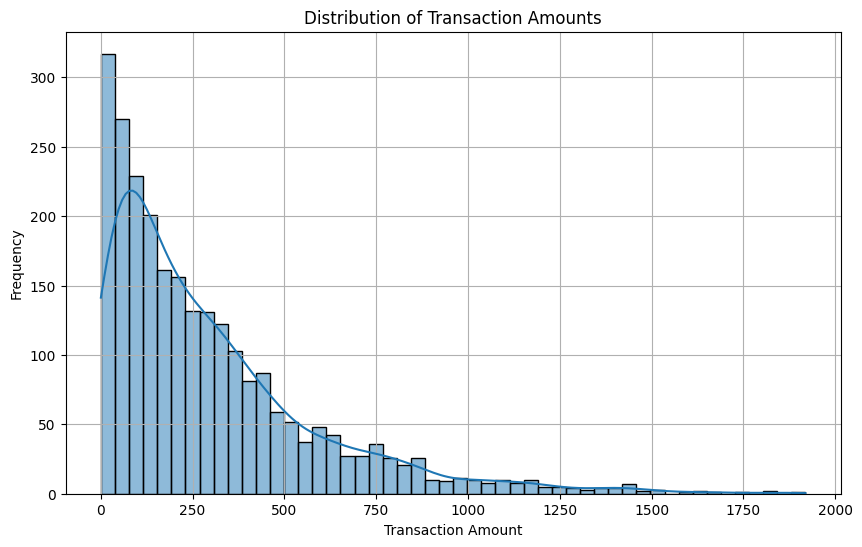

In [17]:
# transaction amount distribution
# histogram of transaction amounts

plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [18]:
daily_transactions = df.groupby(df['TransactionDate'].dt.date).size()
daily_transactions_ma = daily_transactions.rolling(window=7).mean()

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=daily_transactions.index,
        y=daily_transactions.values,
        mode='lines+markers',
        name='Daily Transactions'
    )
)

fig.add_trace(
    go.Scatter(
        x=daily_transactions_ma.index,
        y=daily_transactions_ma.values,
        mode='lines',
        name='7-Day Moving Average',
        line=dict(color='red')
    )
)

fig.update_layout(
    title='Daily Transaction Volume with 7-Day Moving Average',
    xaxis_title='Date',
    yaxis_title='Number of Transactions',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()

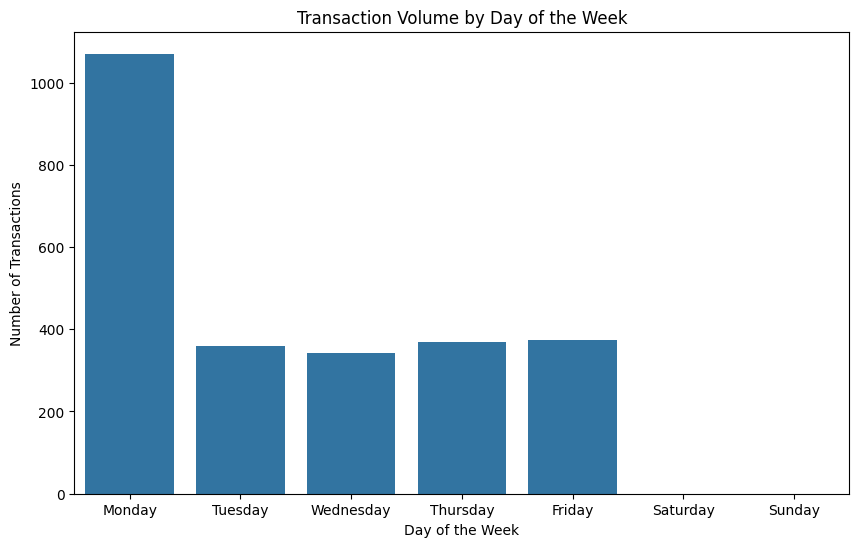

In [19]:
# add a column for day of the week
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.day_name()
# plot transaction volume by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TransactionDayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Transaction Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()

In [20]:
# line chart of count of transactions when TransactionDayOfWeek is Monday
monday_transactions = df[df['TransactionDayOfWeek'] == 'Monday'].groupby(df['TransactionDate'].dt.date).size()

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=monday_transactions.index,
        y=monday_transactions.values,
        mode='lines+markers',
        name='Monday Transactions',
        marker=dict(symbol='circle')
    )
)

fig.update_layout(
    title='Transaction Volume on Mondays',
    xaxis_title='Date',
    yaxis_title='Number of Transactions',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()

In [21]:
# line chart of count of transactions when TransactionDayOfWeek is not Monday, Saturday, or Sunday
non_weekend_transactions = df[~df['TransactionDayOfWeek'].isin(['Monday', 'Saturday', 'Sunday'])].groupby(df['TransactionDate'].dt.date).size()

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=non_weekend_transactions.index,
        y=non_weekend_transactions.values,
        mode='lines+markers',
        name='Non-Weekend Transactions',
        marker=dict(symbol='circle')
    )
)

fig.update_layout(
    title='Transaction Volume on Non-Weekend Days',
    xaxis_title='Date',
    yaxis_title='Number of Transactions',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()

In [22]:
# average transaction amount over time (aggregated weekly)

df['TransactionWeek'] = df['TransactionDate'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_avg_transaction_amount = df.groupby('TransactionWeek')['TransactionAmount'].mean()

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=weekly_avg_transaction_amount.index,
        y=weekly_avg_transaction_amount.values,
        mode='lines+markers',
        name='Weekly Average Transaction Amount',
        marker=dict(symbol='circle'),
        line=dict(dash='solid')
    )
)

fig.update_layout(
    title='Weekly Average Transaction Amount',
    xaxis_title='Week',
    yaxis_title='Average Transaction Amount',
    legend_title='Legend',
    template='plotly_white',
    xaxis=dict(showgrid=True),  
    yaxis=dict(showgrid=True)
)

fig.show()

we know that the unique values of TransactionHour are 16,17,18, let us plot the distribtuion of these values.

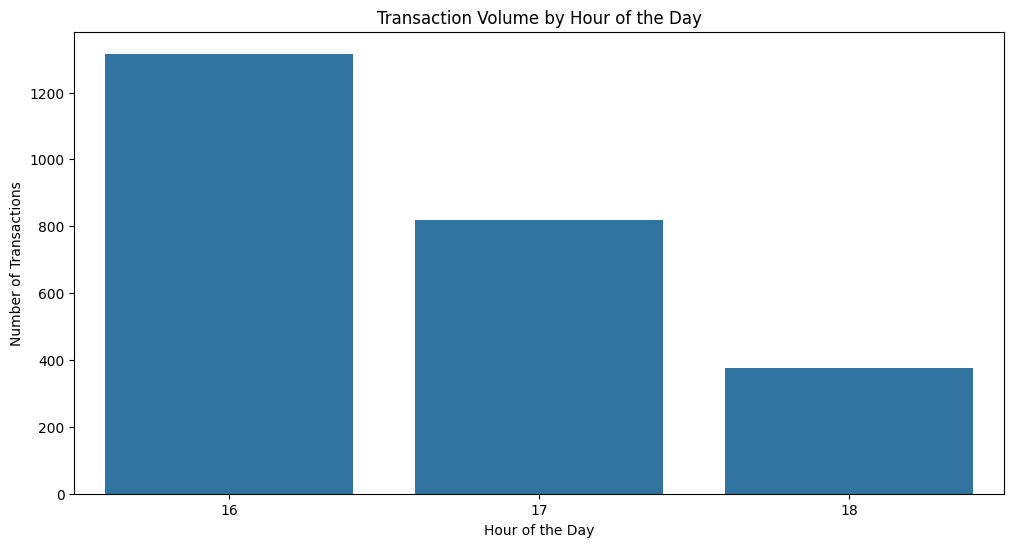

In [23]:
# transactions by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='TransactionHour')
plt.title('Transaction Volume by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()

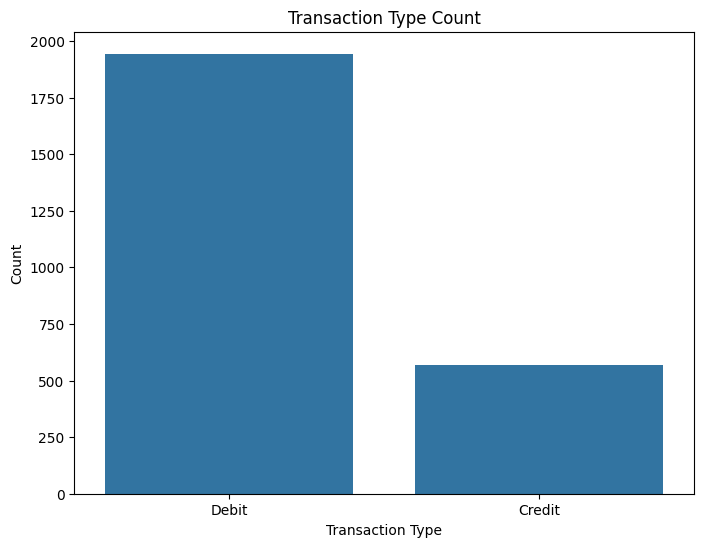

In [24]:
# credit vs. debit volume
# bar chart

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='TransactionType', order=df['TransactionType'].value_counts().index)
plt.title('Transaction Type Count')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

#### User Behaviour & Demographics

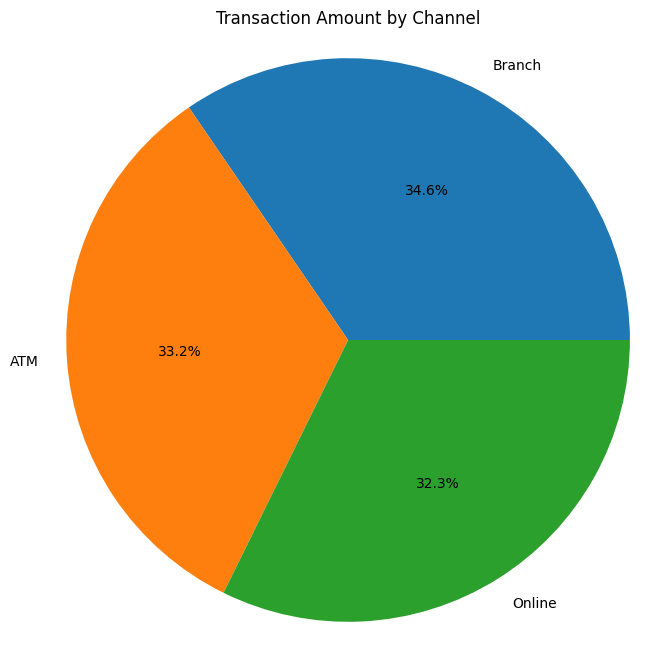

In [25]:
# transacation amount by channel
# pie chart
plt.figure(figsize=(8, 8))
channel_counts = df['Channel'].value_counts()
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%')
plt.title('Transaction Amount by Channel')
plt.axis('equal')
plt.show()

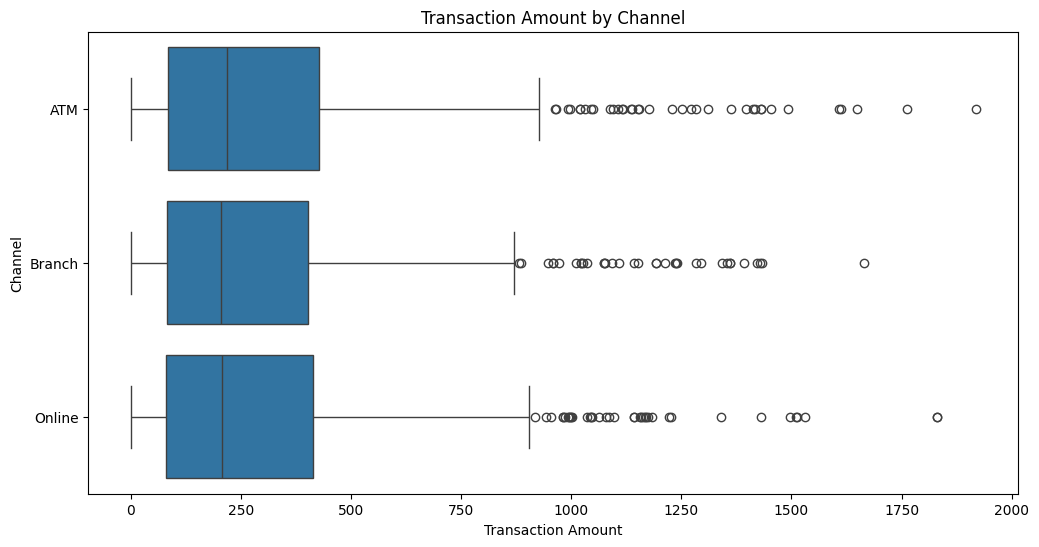

In [26]:
# average anount by channel
# box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='TransactionAmount', y='Channel')
plt.title('Transaction Amount by Channel')
plt.xlabel('Transaction Amount')
plt.ylabel('Channel')
plt.show()

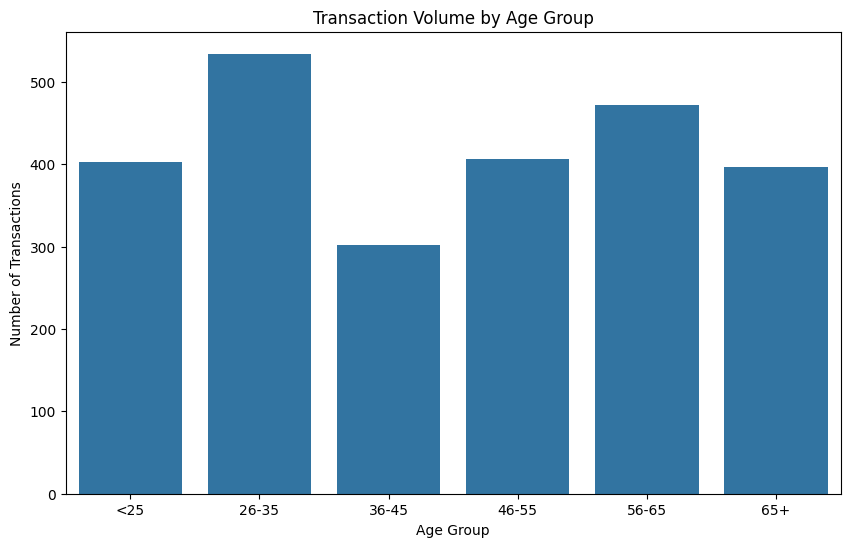

In [27]:
# transaction behaviour by customer age group
# create age bins
age_bins = [0, 25, 35, 45, 55, 65, np.inf]
age_labels = ['<25', '26-35', '36-45', '46-55', '56-65', '65+']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=age_bins, labels=age_labels, right=False)
# plot transaction volume by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeGroup', order=age_labels)
plt.title('Transaction Volume by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.show()

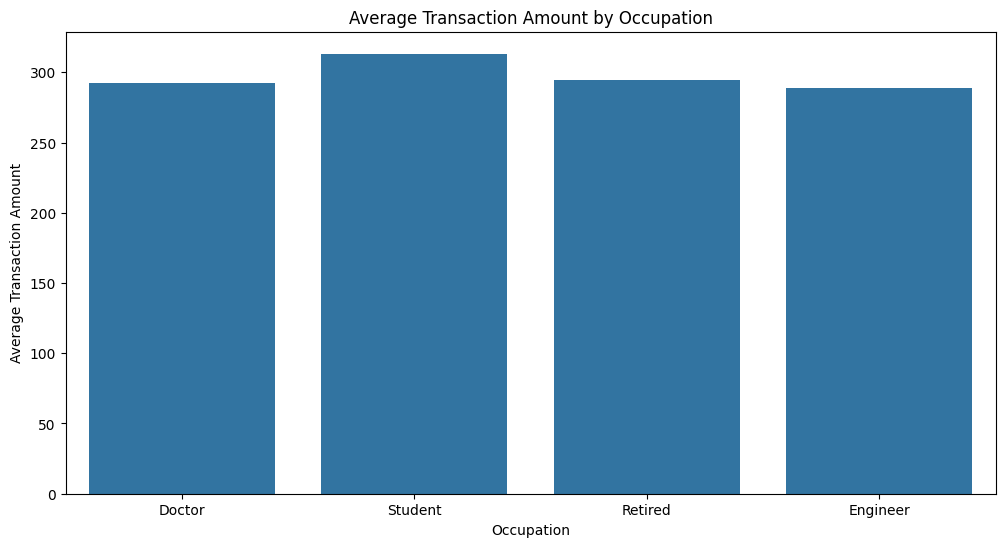

In [28]:
# occupation vs average transaction amount
# bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='CustomerOccupation', y='TransactionAmount', estimator=np.mean, errorbar=None)
plt.title('Average Transaction Amount by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Transaction Amount')
plt.show()

#### Geographic Patterns

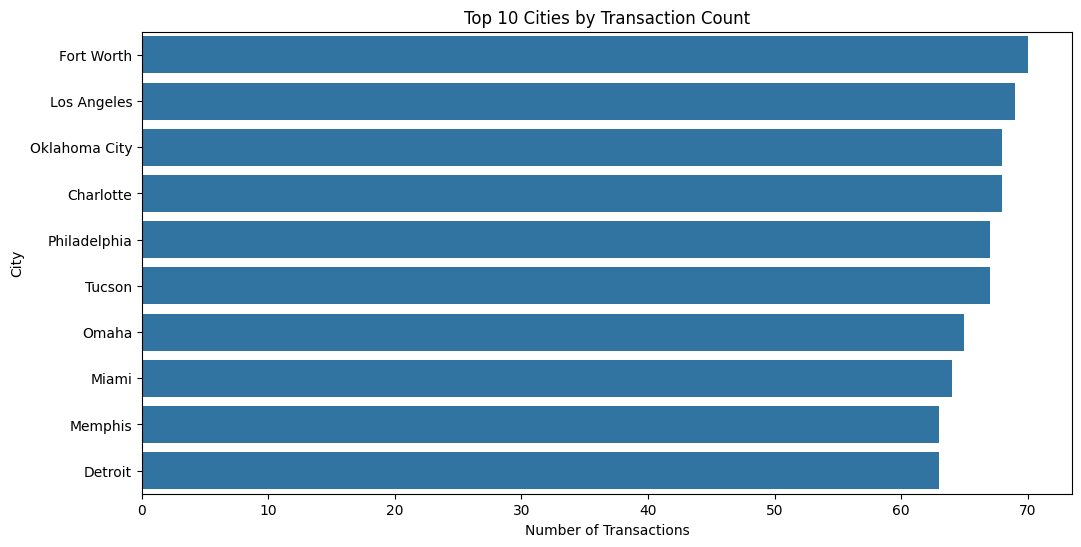

In [29]:
# top cities by transaction count
# horizontal bar plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Location', order=df['Location'].value_counts().index[:10])
plt.title('Top 10 Cities by Transaction Count')
plt.xlabel('Number of Transactions')
plt.ylabel('City')
plt.show()

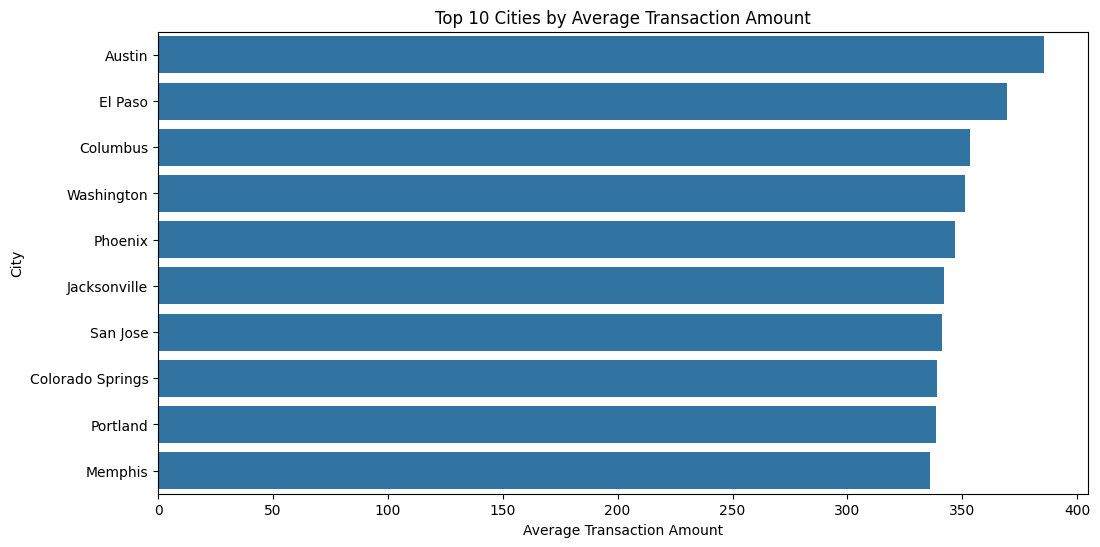

In [30]:
# top cities by average transaction amount
# horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, y='Location', x='TransactionAmount', estimator=np.mean, errorbar=None, order=df.groupby('Location')['TransactionAmount'].mean().nlargest(10).index)
plt.title('Top 10 Cities by Average Transaction Amount')
plt.xlabel('Average Transaction Amount')
plt.ylabel('City')
plt.show()